<center>
<img src="../../img/ods_stickers.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

## <center> Assignment 4 (demo)
### <center>  Sarcasm detection with logistic regression
    
**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit) + [solution](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit-solution).**


We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 
<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

In [1]:
!ls ../input/sarcasm/

datasets_1309_36545_test-balanced.csv  train-balanced-sarcasm.csv
test-unbalanced.csv


In [2]:
# some necessary imports
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
train_df = pd.read_csv("../input/sarcasm/train-balanced-sarcasm.csv")

In [4]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


Some comments are missing, so we drop the corresponding rows.

In [6]:
train_df.dropna(subset=["comment"], inplace=True)

We notice that the dataset is indeed balanced

In [7]:
train_df["label"].value_counts()

0    505405
1    505368
Name: label, dtype: int64

We split data into training and validation parts.

In [8]:
train_texts, valid_texts, y_train, y_valid = train_test_split(
    train_df["comment"], train_df["label"], random_state=17
)

In [9]:
valid_texts

469600    Starting to feel pretty fucking tired of all t...
639137    It's like that label actually has no meaning b...
240293    Mained Fiora - Reworked Mained AP Tristana - W...
702254    Yeah lol that's right they wouldn't let black ...
889040              No, he made the thread asking jokingly.
                                ...                        
23988     Well the devs kind of stopped working on the o...
408769           totally balanced, not game breaking at all
688966    No amount of money can take that experience away.
107936    But guys, you only think D2 was good because o...
767875    BUT HE'S A CAREER THIRD LINER AND WE SHOULD DU...
Name: comment, Length: 252694, dtype: object

## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm (you can use [eli5](https://github.com/TeamHG-Memex/eli5) for that)
4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.

## Links:
  - Machine learning library [Scikit-learn](https://scikit-learn.org/stable/index.html) (a.k.a. sklearn)
  - Kernels on [logistic regression](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification) and its applications to [text classification](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit), also a [Kernel](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection) on feature engineering and feature selection
  - [Kaggle Kernel](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) "Approaching (Almost) Any NLP Problem on Kaggle"
  - [ELI5](https://github.com/TeamHG-Memex/eli5) to explain model predictions

# EDA

Let's see how the some descriptive statistics for the main 3 numeric variables

In [10]:
train_df.groupby("label")[["score", "ups", "downs"]].describe().round(2).T

label                0          1
score count  505405.00  505368.00
      mean        7.37       6.40
      std        55.99      39.23
      min      -298.00    -507.00
      25%         1.00       1.00
      50%         2.00       2.00
      75%         4.00       5.00
      max      5818.00    9070.00
ups   count  505405.00  505368.00
      mean        5.78       5.22
      std        49.29      31.26
      min      -172.00    -507.00
      25%         1.00       0.00
      50%         1.00       1.00
      75%         3.00       4.00
      max      5163.00    4010.00
downs count  505405.00  505368.00
      mean       -0.17      -0.13
      std         0.37       0.33
      min        -1.00      -1.00
      25%         0.00       0.00
      50%         0.00       0.00
      75%         0.00       0.00
      max         0.00       0.00

Hm, ok, no stark difference and we can see that some values are really over-represented. Ok, no point in making the distlpots then.

Let's see if time of the day, month or year when the comment was posted contains any clues.

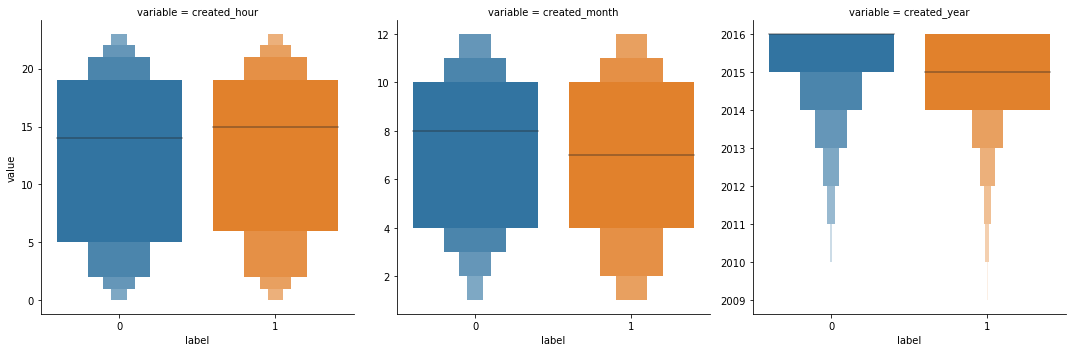

In [11]:
train_df["created_utc"] = pd.to_datetime(train_df["created_utc"])
train_df["created_hour"] = train_df["created_utc"].dt.hour
train_df["created_month"] = train_df["created_utc"].dt.month
train_df["created_year"] = train_df["created_utc"].dt.year

time_df = train_df[["created_hour", "created_month", "created_year", "label"]]
time_df = time_df.melt(
    value_vars=["created_hour", "created_month", "created_year"], id_vars="label"
)

sns.catplot(
    col="variable", y="value", x="label", data=time_df, kind="boxen", sharey=False
)

Again, no strong clues. Alright, let's start with the classic text analysis. Let's first see frequencies of words, bigrams and trigrams.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Make the tokenizer
vectorizer = CountVectorizer(stop_words="english")
vectorizer.fit(train_texts)
words = vectorizer.get_feature_names()

# Get word frequencies
words_sarc = vectorizer.transform(train_texts[y_train == 1]).sum(axis=0).getA1()
words_sarc = pd.DataFrame({"word": words, "freq": words_sarc}).sort_values(
    by="freq", ascending=False
)

words_no_sarc = vectorizer.transform(train_texts[y_train == 0]).sum(axis=0).getA1()
words_no_sarc = pd.DataFrame({"word": words, "freq": words_no_sarc}).sort_values(
    by="freq", ascending=False
)

# Produce a list of top 100 words for both
top_sarc = words_sarc.iloc[:100,].reset_index(drop=True)
top_no_sarc = words_no_sarc.iloc[:100,].reset_index(drop=True)

# Display the list
pd.options.display.max_rows = 100
pd.concat({"Sarcasm": top_sarc, "No Sarcarsm": top_no_sarc}, axis=1)

Sarcasm        No Sarcarsm       
          word   freq        word   freq
0         just  24629        like  22242
1         yeah  24169        just  21194
2         like  19567         don  14314
3          don  15926      people  11615
4       people  15801       think  11571
5        right  11536        good   8786
6         know  10933        know   8564
7         good   9463      really   7809
8         sure   9391        time   7788
9          yes   9099        fuck   7294
10       think   7158        yeah   6661
11          oh   7158        make   6266
12        make   7014         did   6203
13   obviously   6906       right   6062
14      really   6871          ve   5871
15         man   6834        game   5766
16        time   6381         got   5757
17        game   6340        want   5410
18        need   6173       going   5255
19      better   6090        sure   5236
20     totally   6065          ll   5195
21      forgot   5957         way   5188
22        didn   5749      pretty   5171
23         way   5670         say   5052
24        want   5273    actually   4934
25       doesn   5031      better   4888
26          ll   5015        shit   4811
27       great   4914        didn   4808
28     clearly   4902    probably   4670
29        mean   4890        need   4581
30       thing   4738        does   4546
31       going   4668       doesn   4530
32         isn   4472         yes   4388
33         did   4462       thing   4236
34       white   4271         lol   4179
35         got   4214        love   4078
36         bad   4162         use   4053
37         wow   4141       money   4032
38          ve   4067         man   3906
39       women   3867         isn   3694
40        real   3866      thanks   3690
41         let   3853         new   3618
42         use   3824         bad   3533
43         guy   3781        said   3484
44       maybe   3750         guy   3449
45        guys   3738     thought   3431
46         new   3711        look   3426
47        fuck   3702        mean   3399
48       money   3551       looks   3392
49     thought   3506          oh   3388
50         say   3490       maybe   3320
51        shit   3335        work   3267
52        look   3329         lot   3264
53        best   3265        play   3261
54      racist   3260        best   3218
55        work   3179     fucking   3078
56        play   3167       great   3035
57         god   3155         day   3031
58       black   3150       point   3004
59    probably   3129        year   2971
60       makes   3094     getting   2844
61        love   3041       years   2802
62       world   3030       makes   2688
63        stop   2931        nice   2661
64        does   2915       trump   2657
65         nah   2883        post   2640
66      reddit   2825        feel   2634
67    actually   2784        long   2559
68        wait   2724      things   2528
69       wrong   2723         let   2446
70         hey   2710         try   2426
71       guess   2666         old   2405
72         men   2661        team   2401
73         yea   2660          10   2359
74        team   2624       doing   2284
75        nice   2611        life   2275
76        year   2608      little   2270
77      things   2599        used   2255
78  definitely   2595        real   2227
79        free   2555        read   2202
80        aren   2534       guess   2188
81     fucking   2520         big   2173
82       cause   2495      saying   2164
83        life   2489      wouldn   2150
84       years   2482         won   2149
85        said   2469        tell   2135
86          op   2455         god   2117
87         won   2449       games   2117
88      pretty   2443       wrong   2112
89      course   2424          op   2088
90        tell   2391      reddit   2087
91        dude   2347        true   2085
92     getting   2327        come   2050
93      sounds   2319        hard   2042
94      thanks   2313     believe   2036
95        hard   2296        h

Wow ok, that was a waste of screen real estate. Fine, let's do the bigrams then too (and end EDA with that), hoping it makes slightly more sense

In [13]:
# Make the tokenizer
vectorizer2 = CountVectorizer(stop_words="english", ngram_range=(2, 2))
vectorizer2.fit(train_texts)
bigrams = vectorizer2.get_feature_names()

# Get word frequencies
bi_sarc = vectorizer2.transform(train_texts[y_train == 1]).sum(axis=0).getA1()
bi_sarc = pd.DataFrame({"bigram": bigrams, "freq": bi_sarc}).sort_values(
    by="freq", ascending=False
)

bi_no_sarc = vectorizer2.transform(train_texts[y_train == 0]).sum(axis=0).getA1()
bi_no_sarc = pd.DataFrame({"word": bigrams, "freq": bi_no_sarc}).sort_values(
    by="freq", ascending=False
)

# Produce a list of top 100 words for both
top2_sarc = bi_sarc.iloc[:100,].reset_index(drop=True)
top2_no_sarc = bi_no_sarc.iloc[:100,].reset_index(drop=True)

# Display the list
pd.concat({"Sarcasm": top2_sarc, "No Sarcarsm": top2_no_sarc}, axis=1)

Sarcasm                    No Sarcarsm      
             bigram  freq                     word  freq
0          don know  2132                fuck fuck  3258
1       sounds like  1499               looks like  1957
2         just like  1357              money money  1674
3        good thing  1219                 don know  1645
4        looks like  1046                don think  1494
5         don worry   906              jerry jerry  1341
6      white people   892          comcast comcast  1250
7         didn know   849              sounds like  1229
8           oh yeah   821            iphone iphone  1111
9      black people   767                liar liar  1074
10         don want   708            raving raving  1017
11      pretty sure   678              pretty sure  1005
12         don like   633             donald trump   929
13     yeah totally   602                fake news   926
14        yeah sure   600                news fake   899
15        don think   597                feel like   873
16        yeah fuck   573                  ve seen   841
17        yeah like   572             trump donald   783
18   don understand   554                look like   685
19        make sure   540                 don want   652
20       don forget   532                just like   634
21        yeah just   511              ziggo ziggo   619
22         year old   508  gjallarhorn gjallarhorn   615
23      makes sense   505              love trumps   530
24          nah man   492                hate love   529
25           ah yes   487              trumps hate   529
26          ve seen   480                  cmd cmd   486
27       people don   462                 year old   464
28         don need   462                years ago   458
29       sound like   454              makes sense   457
30        thank god   441                 don like   448
31         just don   422                   ve got   434
32        look like   419                   lm ayy   420
33         yeah man   411                   ayy lm   419
34       yeah cause   399               don forget   417
35     doesn matter   385                 ve heard   416
36        just need   375                holy shit   415
37     think forgot   375                make sure   403
38           ve got   338                didn know   391
39        years ago   333              pretty good   385
40         yeah let   328             tronald dump   384
41     sorry forgot   318             dump tronald   383
42         let just   312               people don   377
43       forgot add   298                 just don   334
44      yeah really   296                   oh god   326
45      people just   288                 don need   325
46          hey man   287           don understand   315
47           oh god   283               doesn mean   314
48      poor people   282               good thing   304
49   global warming   282              really good   300
50    think dropped   281                don worry   299
51      free market   278                  kek kek   292
52       great idea   273                  wat wat   287
53          ll just   273               don really   285
54         ve heard   269                good luck   284
55      yeah people   267              people like   283
56        just make   267                 just got   271
57      video games   264               lot people   270
58          im sure   262                long time   269
59      doesn count   261               sound like   261
60       white male   258               make sense   260
61       maybe just   256              high school   260
62         good job   251               think just   254
63          sure ll   249                 don care   252
64      people like   247                just want   250
65       yeah right   246            united states   240
66        feel like   243              people just   235
67           oh man   243                does mean   226
68         yeah don   

lmao comcast... Ok this is getting much more interesting. Well, let's get to work now!

# Logistic regression

In [14]:
# Fit the model - using up to trigrams
pipe = Pipeline(
    [
        ("tf-idf", TfidfVectorizer(ngram_range=(1, 3), min_df=2)),
        ("logistic_regression", LogisticRegression(n_jobs=-1)),
    ],
    verbose=True,
)
pipe.fit(train_texts, y_train)

# Prediction
prediction = pipe.predict(valid_texts)

[Pipeline] ............ (step 1 of 2) Processing tf-idf, total=  49.4s
[Pipeline]  (step 2 of 2) Processing logistic_regression, total=  43.3s


In [15]:
accuracy_score(prediction, y_valid)

0.728200907025889

In [16]:
pd.DataFrame(confusion_matrix(y_valid, prediction, normalize="true",))

,0,1
0,0.756247,0.243753
1,0.299828,0.700172


Ok, so good 72% accuracy, and it seems it is equally good at classifying non-sarcastic and sarcastic posts.

# Most predictive features

In [17]:
! conda install -y eli5

Solving environment: done

# All requested packages already installed.



In [18]:
from eli5 import show_weights

show_weights(pipe, top=(30, 30))

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight?,Feature
+10.258,yes because
+10.069,obviously
+9.743,clearly
+9.493,totally
+9.284,because
+8.840,yeah because
+6.415,good thing
+6.255,fault
+6.129,how dare
+6.098,don you know


Alright, this makes sense. Also, notice how there's no trigrams in the list? Interesting

# Adding more features

Alright bitches, it's fun time. We're gonna add subreddit, hour of day, month and year as a feature -- and see how well we do :)

In [24]:
for col in ['created_hour', 'created_month', 'created_year']:
    train_df[col] = train_df[col].astype(str)
    
X_train = train_df.loc[
    train_texts.index,
]
X_val = train_df.loc[
    valid_texts.index,
]

In [25]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    [
        ("comment", TfidfVectorizer(ngram_range=(1, 3), min_df=2), "comment"),
        ("subreddit", CountVectorizer(min_df=2), "subreddit"),
        #("created_hour", CountVectorizer(), "created_hour"),
        #("created_month", CountVectorizer(), "created_month"),
        #("created_year", CountVectorizer(), "created_year"),
    ],
    verbose=True,
    n_jobs=-1,
)

# Fit the model - using up to trigrams
pipe2 = Pipeline(
    [
        ("transform_cols", transformer),
        ("logistic_regression", LogisticRegression(n_jobs=-1)),
    ],
    verbose=True,
)
pipe2.fit(X_train, y_train)

# Prediction
prediction2 = pipe2.predict(X_val)

[Pipeline] .... (step 1 of 2) Processing transform_cols, total= 1.1min
[Pipeline]  (step 2 of 2) Processing logistic_regression, total=  45.7s


In [26]:
accuracy_score(prediction2, y_valid)

0.7254426302167839

LMAO we actually nuked the accuracy. Probably needs smaller C - more regularization. But don't have time to try out these things rn.

In [27]:
pd.DataFrame(confusion_matrix(y_valid, prediction2, normalize="true",))

,0,1
0,0.754307,0.245693
1,0.303404,0.696596


In [28]:
from eli5 import show_weights

show_weights(pipe2, top=(30, 30))

Weight?,Feature
+12.964,comment__because
+12.523,comment__yes because
+11.254,comment__clearly
+10.159,comment__obviously
+9.675,comment__totally
+9.284,comment__yeah because
+8.042,comment__yeah
+7.562,comment__fault
+7.526,comment__good thing
+7.526,comment__shitlord
